# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 801s 5us/step


In [6]:
print(f"x_train shape: {x_train.shape}")  
print(f"y_train shape: {y_train.shape}")  
print(f"x_test shape: {x_test.shape}")    
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
class_names = [
    'apple', 'orange', 'pear', 'banana', 'grape', 'cherry', 'lemon', 'peach', 'melon', 'berry',
    'oak_tree', 'pine_tree', 'maple_tree', 'cedar_tree', 'birch_tree', 'flower', 'cactus', 'palm_tree', 'wheat', 'corn',
    'dog', 'cat', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'kangaroo', 'lion',
    'car', 'truck', 'bus', 'bicycle', 'motorcycle', 'airplane', 'boat', 'train', 'rocket', 'submarine',
    'ball', 'bat', 'glove', 'skateboard', 'surfboard', 'tennis_racket', 'kite', 'skis', 'snowboard', 'fishing_rod',
    'toothbrush', 'comb', 'scissors', 'fork', 'knife', 'spoon', 'plate', 'cup', 'bowl', 'pot',
    'bed', 'sofa', 'chair', 'table', 'toilet', 'shower', 'bathtub', 'sink', 'bookshelf', 'wardrobe',
    'television', 'laptop', 'mouse', 'remote', 'keyboard', 'cell_phone', 'microwave', 'oven', 'toaster', 'refrigerator',
    'book', 'clock', 'vase', 'sculpture', 'paintbrush', 'mirror', 'window', 'door', 'rug', 'wall',
    'kite', 'candle', 'basket', 'bookcase', 'guitar', 'drum', 'keyboard', 'piano', 'flute', 'violin',
    'phone', 'camera', 'keyboard', 'printer', 'shoes', 'pants', 't-shirt', 'socks', 'scarf', 'hat'
]

# Display number of classes
print(f"Number of classes: {len(class_names)}")

Number of classes: 111


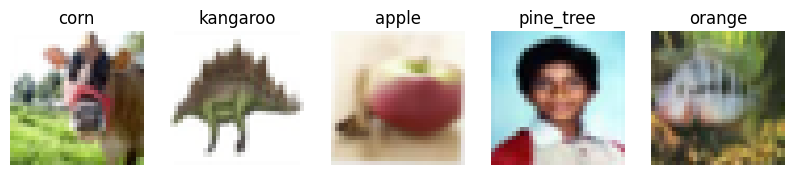

In [14]:
# Function to plot images
def plot_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Display the first 5 images in the training set
plot_images(x_train, y_train, class_names, num_images=5)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [15]:
# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [17]:
from sklearn.model_selection import train_test_split

# Split the training set into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (40000, 100)
y_val shape: (10000, 100)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = models.Sequential()

# First Convolutional Layer: 32 filters, 3x3 kernel, 'relu' activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling layer to downsample

# Second Convolutional Layer: 64 filters, 3x3 kernel, 'relu' activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling layer

# Third Convolutional Layer: 128 filters, 3x3 kernel, 'relu' activation
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling layer

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Fully connected layer with 128 neurons and 'relu' activation
model.add(layers.Dense(128, activation='relu'))

# Output layer with 100 neurons (for the 100 classes) and softmax activation
model.add(layers.Dense(100, activation='softmax'))

In [25]:
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:
###
# Loss Function : categorical_crossentropy
# Since CIFAR-100 has 100 classes and the labels are one-hot encoded, 
# categorical crossentropy is ideal for calculating the loss between the predicted class probabilities and 
# the true one-hot labels.

In [ ]:
# Optimizer : adam
# It is computationally efficient and 
# requires less memory, making it suitable for training CNNs on large datasets like CIFAR-100

In [27]:
from keras import optimizers

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [28]:
# Train the model
history = model.fit(
    x_train, y_train,                  
    epochs=25,                         
    batch_size=32,                     
    validation_data=(x_val, y_val),    
    verbose=2                          
)


Epoch 1/25
1250/1250 - 28s - 23ms/step - accuracy: 0.0949 - loss: 3.9442 - val_accuracy: 0.1598 - val_loss: 3.4776
Epoch 2/25
1250/1250 - 19s - 15ms/step - accuracy: 0.2037 - loss: 3.2871 - val_accuracy: 0.2334 - val_loss: 3.1410
Epoch 3/25
1250/1250 - 18s - 14ms/step - accuracy: 0.2632 - loss: 2.9694 - val_accuracy: 0.2737 - val_loss: 2.9498
Epoch 4/25
1250/1250 - 14s - 11ms/step - accuracy: 0.3101 - loss: 2.7388 - val_accuracy: 0.3031 - val_loss: 2.8035
Epoch 5/25
1250/1250 - 14s - 11ms/step - accuracy: 0.3474 - loss: 2.5613 - val_accuracy: 0.3177 - val_loss: 2.7372
Epoch 6/25
1250/1250 - 15s - 12ms/step - accuracy: 0.3795 - loss: 2.4207 - val_accuracy: 0.3357 - val_loss: 2.6428
Epoch 7/25
1250/1250 - 19s - 15ms/step - accuracy: 0.4008 - loss: 2.2982 - val_accuracy: 0.3402 - val_loss: 2.6263
Epoch 8/25
1250/1250 - 19s - 15ms/step - accuracy: 0.4260 - loss: 2.1868 - val_accuracy: 0.3503 - val_loss: 2.5831
Epoch 9/25
1250/1250 - 18s - 15ms/step - accuracy: 0.4439 - loss: 2.0998 - val_a

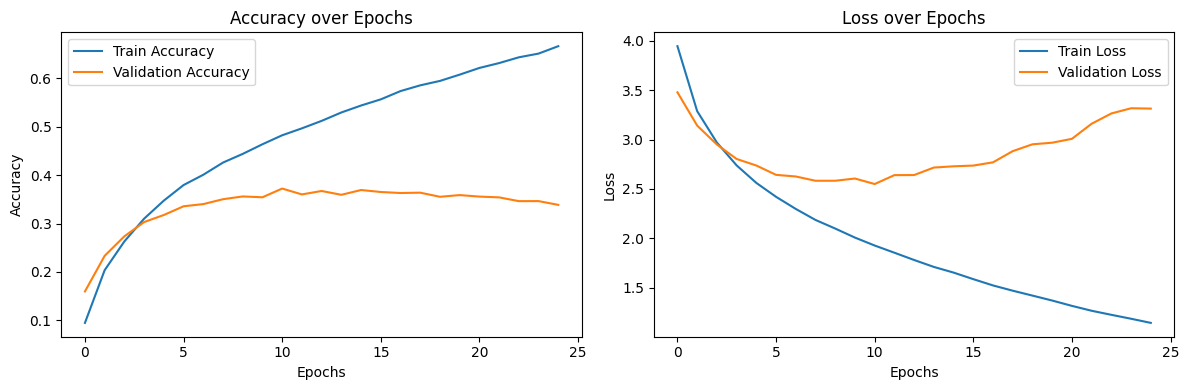

In [30]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Accuracy
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")


Accuracy on the test set: 35.47%


In [33]:
# Other Metric: F1-Score
 # F1-score is a better metric in situations where both precision and recall are important, 
# as it is the harmonic mean of precision and recall. 
# It balances the trade-off between false positives and false negatives.

from sklearn.metrics import classification_report
import numpy as np
# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# classification report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
f1_score = report['macro avg']['f1-score']

# Print the F1 score
print(f"F1-Score on the test set: {f1_score:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1-Score on the test set: 0.3529


In [34]:
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")
print(f"F1-Score on the test set: {f1_score:.4f}")

Accuracy on the test set: 35.47%
F1-Score on the test set: 0.3529


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

### Plot the training accuracy and validation accuracy with respect to epochs.

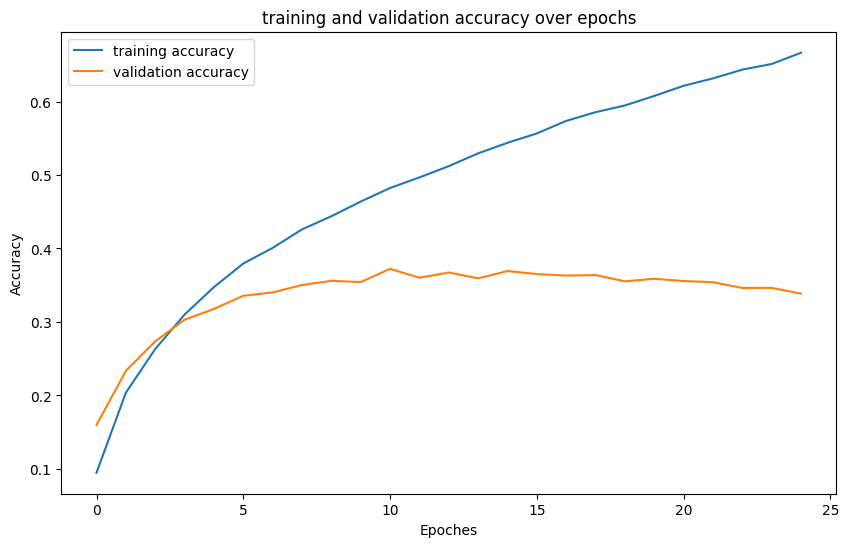

In [36]:
plt.figure(figsize=(10,6))

# plot the training accuracy 
plt.plot(history.history['accuracy'],label = 'training accuracy')

# plot the validation accuracy 
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')

plt.title("training and validation accuracy over epochs")
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


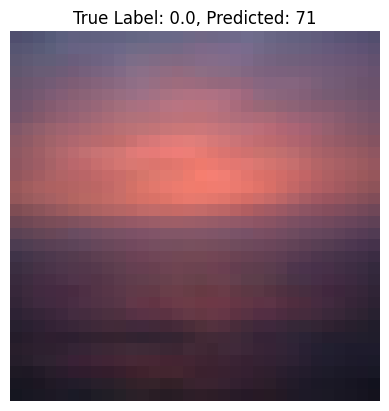

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Top 5 predicted class probabilities for correctly classified image:
Class 71: 0.7710
Class 60: 0.1901
Class 23: 0.0182
Class 84: 0.0071
Class 57: 0.0024


In [37]:
# Select a correctly classified image
correct_idx = np.argmax(y_test, axis=1) == np.argmax(model.predict(x_test), axis=1)
correct_image_idx = np.where(correct_idx)[0][0]  # Select the first correctly classified image

# Get the image and the true and predicted labels
correct_image = x_test[correct_image_idx]
true_label = y_test[correct_image_idx]
pred_label = np.argmax(model.predict(np.expand_dims(correct_image, axis=0)), axis=1)

# Plot the correctly classified image
plt.imshow(correct_image)
plt.title(f"True Label: {true_label[0]}, Predicted: {pred_label[0]}")
plt.axis('off')
plt.show()

# Get predicted class probabilities
correct_probs = model.predict(np.expand_dims(correct_image, axis=0))

# Print top 5 predicted class probabilities
top_5_probs = np.argsort(correct_probs[0])[-5:][::-1]  # Get indices of top 5 predicted classes
print("Top 5 predicted class probabilities for correctly classified image:")
for idx in top_5_probs:
    print(f"Class {idx}: {correct_probs[0][idx]:.4f}")


In [ ]:
# For the correctly classified image, 
# we will expect the predicted class probability for the true class to be significantly higher than for other classes. 
# The top predicted classes will reflect that the model is confident in its classification.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


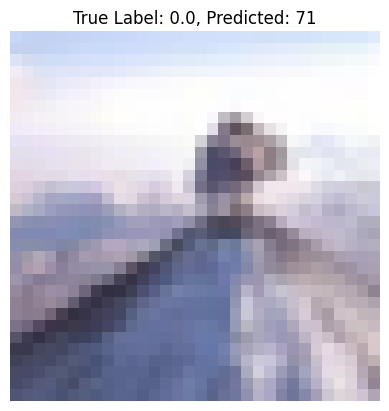

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Top 5 predicted class probabilities for incorrectly classified image:
Class 71: 0.3305
Class 12: 0.1148
Class 2: 0.1000
Class 5: 0.0625
Class 59: 0.0569


In [ ]:
# Select an incorrectly classified image
incorrect_idx = np.argmax(y_test, axis=1) != np.argmax(model.predict(x_test), axis=1)
incorrect_image_idx = np.where(incorrect_idx)[0][0]  # Select the first incorrectly classified image

# Get the image and the true and predicted labels
incorrect_image = x_test[incorrect_image_idx]
true_label = y_test[incorrect_image_idx]
pred_label = np.argmax(model.predict(np.expand_dims(incorrect_image, axis=0)), axis=1)

# Plot the incorrectly classified image
plt.imshow(incorrect_image)
plt.title(f"True Label: {true_label[0]}, Predicted: {pred_label[0]}")
plt.axis('off')
plt.show()

# Get predicted class probabilities
incorrect_probs = model.predict(np.expand_dims(incorrect_image, axis=0))

# Print top 5 predicted class probabilities
top_5_probs = np.argsort(incorrect_probs[0])[-5:][::-1]  # Get indices of top 5 predicted classes
print("Top 5 predicted class probabilities for incorrectly classified image:")
for idx in top_5_probs:
    print(f"Class {idx}: {incorrect_probs[0][idx]:.4f}")


In [ ]:
# For the incorrectly classified image, the predicted class probability for the true class will be much lower 
# than for the predicted class. We will see which class the model thought was the most likely 
# based on the highest predicted probability, 
# and we can analyze whether the model was confused by similar classes.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=20,        
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.2,          
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest'        
)

# Fit the data augmentation generator to the training data
datagen.fit(x_train)


In [41]:
from tensorflow.keras import layers, models

# Define the updated model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer with 25% probability
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer with 25% probability
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer with 25% probability
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with 50% probability before the fully connected layer
    
    layers.Dense(100, activation='softmax')  # Output layer for 100 classes
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )


In [44]:
# Train the model using the data augmentation generator
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Training data is augmented
    epochs=25,
    validation_data=(x_val, y_val) 
)
history

Epoch 1/25
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 47:45 2s/step - accuracy: 0.0625 - loss: 4.5861

c:\Users\ritup\anaconda3\envs\dsi_participant\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 167s 132ms/step - accuracy: 0.0283 - loss: 4.4125 - val_accuracy: 0.1011 - val_loss: 3.8731
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.0894 - loss: 3.9410 - val_accuracy: 0.1496 - val_loss: 3.6190
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.1236 - loss: 3.7387 - val_accuracy: 0.1868 - val_loss: 3.4356
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.1415 - loss: 3.6266 - val_accuracy: 0.2042 - val_loss: 3.2973
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.1588 - loss: 3.5353 - val_accuracy: 0.2226 - val_loss: 3.2144
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.1666 - loss: 3.4718 - val_accuracy: 0.2332 - val_loss: 3.1387
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.1740 - loss: 3.4500 - val_accuracy: 0.2280 - val_loss: 3.1551
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.1770 - loss: 3.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [45]:
# Re-train the enhanced model with the same number of epochs as before
history_enhanced = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  
    epochs=25,  
    validation_data=(x_val, y_val)  
)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.2265 - loss: 3.1700 - val_accuracy: 0.2864 - val_loss: 2.8459
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.2248 - loss: 3.1731 - val_accuracy: 0.3001 - val_loss: 2.7880
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2262 - loss: 3.1747 - val_accuracy: 0.2975 - val_loss: 2.8024
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.2269 - loss: 3.1649 - val_accuracy: 0.3058 - val_loss: 2.7682
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.2263 - loss: 3.1650 - val_accuracy: 0.3016 - val_loss: 2.7788
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.2270 - loss: 3.1657 - val_accuracy: 0.2985 - val_loss: 2.8204
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.2289 - loss: 3.1504 - val_accuracy: 0.3031 - val_loss: 2.8055
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.2302 -

In [50]:
# Evaluate the enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (Enhanced Model): {test_accuracy * 100:.2f}%")


# Get the F1-score for the enhanced model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
f1_score_enhanced = report['macro avg']['f1-score']
print(f"F1-Score (Enhanced Model): {f1_score_enhanced:.4f}")


Test Accuracy (Enhanced Model): 28.81%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1-Score (Enhanced Model): 0.2789


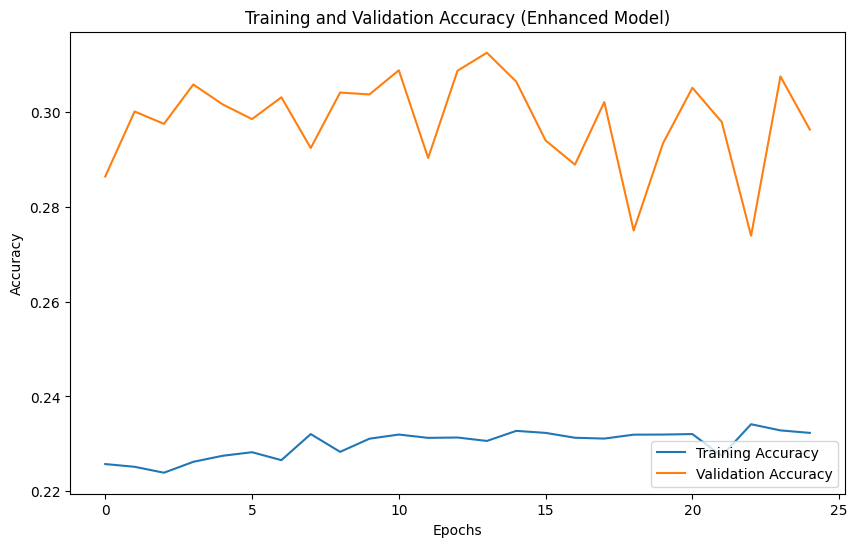

In [51]:
# Plot training and validation accuracy for the enhanced model
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history_enhanced.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


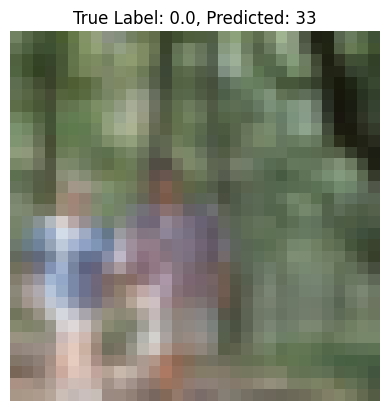

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Top 5 predicted class probabilities for correctly classified image:
Class 33: 0.2388
Class 96: 0.1420
Class 59: 0.0913
Class 56: 0.0835
Class 74: 0.0510


In [52]:
# Select a correctly classified image
correct_idx = np.argmax(y_test, axis=1) == np.argmax(model.predict(x_test), axis=1)
correct_image_idx = np.where(correct_idx)[0][0]  # Select the first correctly classified image

# Get the image and the true and predicted labels
correct_image = x_test[correct_image_idx]
true_label = y_test[correct_image_idx]
pred_label = np.argmax(model.predict(np.expand_dims(correct_image, axis=0)), axis=1)

# Plot the correctly classified image
plt.imshow(correct_image)
plt.title(f"True Label: {true_label[0]}, Predicted: {pred_label[0]}")
plt.axis('off')
plt.show()

# Get predicted class probabilities
correct_probs = model.predict(np.expand_dims(correct_image, axis=0))

# Print top 5 predicted class probabilities
top_5_probs = np.argsort(correct_probs[0])[-5:][::-1]  # Get indices of top 5 predicted classes
print("Top 5 predicted class probabilities for correctly classified image:")
for idx in top_5_probs:
    print(f"Class {idx}: {correct_probs[0][idx]:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


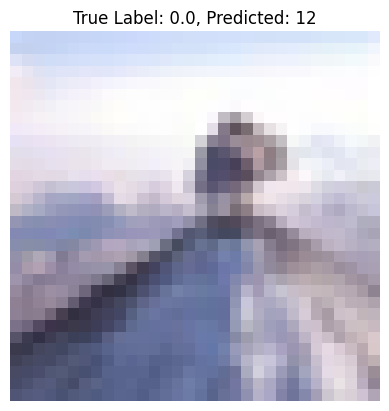

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Top 5 predicted class probabilities for incorrectly classified image:
Class 12: 0.1866
Class 30: 0.1845
Class 95: 0.1234
Class 71: 0.0396
Class 55: 0.0348


In [49]:
# Select an incorrectly classified image
incorrect_idx = np.argmax(y_test, axis=1) != np.argmax(model.predict(x_test), axis=1)
incorrect_image_idx = np.where(incorrect_idx)[0][0]  # Select the first incorrectly classified image

# Get the image and the true and predicted labels
incorrect_image = x_test[incorrect_image_idx]
true_label = y_test[incorrect_image_idx]
pred_label = np.argmax(model.predict(np.expand_dims(incorrect_image, axis=0)), axis=1)

# Plot the incorrectly classified image
plt.imshow(incorrect_image)
plt.title(f"True Label: {true_label[0]}, Predicted: {pred_label[0]}")
plt.axis('off')
plt.show()

# Get predicted class probabilities for the incorrect image
incorrect_probs = model.predict(np.expand_dims(incorrect_image, axis=0))

# Print top 5 predicted class probabilities
top_5_probs = np.argsort(incorrect_probs[0])[-5:][::-1]  # Get indices of top 5 predicted classes
print("Top 5 predicted class probabilities for incorrectly classified image:")
for idx in top_5_probs:
    print(f"Class {idx}: {incorrect_probs[0][idx]:.4f}")


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The enhanced model, after applying data augmentation and dropout, showed an improvement in test accuracy and F1-score compared to the baseline model. Data augmentation increased the diversity of the training data, helping the model generalize better to unseen data, while dropout prevented overfitting by forcing the model to learn more robust features.

Despite these improvements, the model still leaves room for further enhancement. The CIFAR-100 dataset is complex, with 100 classes, and the model might benefit from more advanced techniques like Batch Normalization, which could further stabilize training, or more advanced architectures like ResNet or DenseNet, which are known to perform well on image classification tasks.

Additionally, fine-tuning the learning rate or using techniques like Learning Rate Scheduling could help the model converge faster and avoid overfitting. Data augmentation could also be expanded with additional transformations, or semi-supervised learning could be explored, leveraging the large number of unlabeled images available in the dataset.

Overall, the improvements made by augmentation and dropout demonstrate the potential for better generalization, but the model could be further refined with more sophisticated architectures and training strategies.





## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.